<a href="https://colab.research.google.com/github/nhutd107/AI_CDT_20146509_-D.Nhu-/blob/main/Fuzzy_Power_Baitap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


49.13492063492064


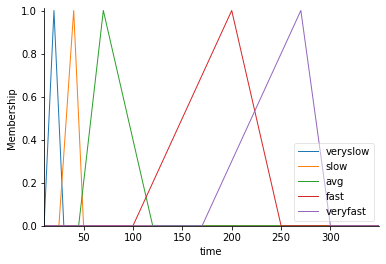

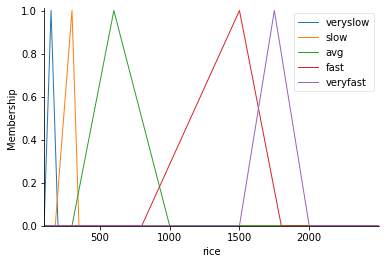

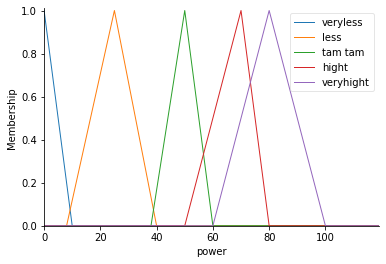

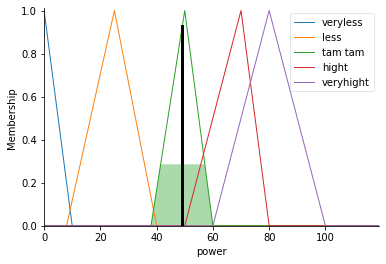

In [11]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl


#tạo biến và xác định khoảng giá trị
time = ctrl.Antecedent(np.arange(10,350,1),'time')
rice = ctrl.Antecedent(np.arange(100,2500,1),'rice')
power = ctrl.Consequent(np.arange(0,120,1),'power')
#5 giá trị cần liệt kê: ( nhanh-rất nhanh-trung bình-chậm-rất chậm)
#đồ thị của  thời gian    # (fast-veryfast-avg-slow-veryslow)
time['veryslow']= fuzz.trimf(time.universe,[10,20,30])
time['slow']= fuzz.trimf(time.universe,[25,40,50])
time['avg']= fuzz.trimf(time.universe,[45,70,120])
time['fast']= fuzz.trimf(time.universe,[100,200,250])
time['veryfast']= fuzz.trimf(time.universe,[170,270,300])

#đồ thị của  lượng gạo   
rice['veryslow']= fuzz.trimf(rice.universe,[100,150,200])
rice['slow']= fuzz.trimf(rice.universe,[180,300,350])
rice['avg']= fuzz.trimf(rice.universe,[300,600,1000])
rice['fast']= fuzz.trimf(rice.universe,[800,1500,1800])
rice['veryfast']= fuzz.trimf(rice.universe,[1500,1750,2000])
#vẽ power

power['veryless']= fuzz.trimf(power.universe,[0,0,10])
power['less']= fuzz.trimf(power.universe,[8,25,40])
power['tam tam']= fuzz.trimf(power.universe,[38,50,60])
power['hight']= fuzz.trimf(power.universe,[50,70,80])
power['veryhight']= fuzz.trimf(power.universe,[60,80,100])

time.view()
rice.view()
power.view()

#luật cho các trường hợp
#ta sẽ cần 25 luật cho nồi cơm điện này
rule1 = ctrl.Rule(time['veryslow']&rice['veryslow'],power['veryless'])
rule2 = ctrl.Rule(time['slow']&rice['veryslow'],power['veryless'])
rule3 = ctrl.Rule(time['avg']&rice['veryslow'],power['less'])
rule4 = ctrl.Rule(time['fast']&rice['veryslow'],power['tam tam'])
rule5 = ctrl.Rule(time['veryfast']&rice['veryslow'],power['less'])

rule6 = ctrl.Rule(time['veryslow']&rice['slow'],power['veryless'])
rule7 = ctrl.Rule(time['slow']&rice['slow'],power['less'])
rule8 = ctrl.Rule(time['avg']&rice['slow'],power['less'])
rule9 = ctrl.Rule(time['fast']&rice['slow'],power['less'])
rule10 = ctrl.Rule(time['veryfast']&rice['slow'],power['hight'])

rule11 = ctrl.Rule(time['veryslow']&rice['avg'],power['tam tam'])
rule12 = ctrl.Rule(time['slow']&rice['avg'],power['less'])
rule13 = ctrl.Rule(time['avg']&rice['avg'],power['tam tam'])
rule14 = ctrl.Rule(time['fast']&rice['avg'],power['hight'])
rule15 = ctrl.Rule(time['veryfast']&rice['avg'],power['hight'])

rule16 = ctrl.Rule(time['veryslow']&rice['fast'],power['less'])
rule17 = ctrl.Rule(time['slow']&rice['fast'],power['tam tam'])
rule18 = ctrl.Rule(time['avg']&rice['fast'],power['tam tam'])
rule19 = ctrl.Rule(time['fast']&rice['fast'],power['hight'])
rule20 = ctrl.Rule(time['veryfast']&rice['fast'],power['veryhight'])

rule21 = ctrl.Rule(time['veryslow']&rice['veryfast'],power['tam tam'])
rule22 = ctrl.Rule(time['slow']&rice['veryfast'],power['tam tam'])
rule23 = ctrl.Rule(time['avg']&rice['veryfast'],power['hight'])
rule24 = ctrl.Rule(time['fast']&rice['veryfast'],power['veryhight'])
rule25 = ctrl.Rule(time['veryfast']&rice['veryfast'],power['veryhight'])


## đưa all các luật vào
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
#học luâth
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']=100        #giá trị đọc từ cảm biến
powering.input['rice'] = 1000  #giá trị đọc từ cảm biến

powering.compute()
#xuất ra màn hình
print(powering.output['power'])
power.view(sim = powering)